In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

First reading in the red wine quality csv file.

In [60]:
red_wine_quality = pd.read_csv("winequality-red.csv", sep = ";")

Next, we want to split the target of red wine quality from all of the explanatory variables and then create our training, testing, and validation datasets.

In [63]:
X = red_wine_quality.drop("quality", axis = 1)
y = red_wine_quality["quality"]

# Creating the training and testing datasets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.2)

# Creating the validation dataset from the training data
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.2)

We can now create our simple linear regression using the closed form solution.

In [66]:
# Add a column of 1s to the X datasets for beta_0
X_train_1 = np.c_[np.ones(X_train.shape[0]), X_train]

w_train = np.linalg.inv(X_train_1.T @ X_train_1) @ X_train_1.T @ y_train 

y_train_pred = X_train_1 @ w_train

Now plotting the actual (x-axis) against the predicted (y-axis).

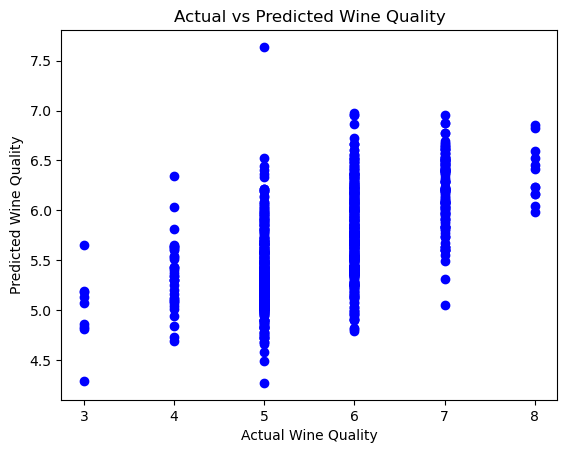

In [69]:
plt.scatter(y_train, y_train_pred, color = "blue")
plt.xlabel("Actual Wine Quality")
plt.ylabel("Predicted Wine Quality")
plt.title("Actual vs Predicted Wine Quality")
plt.show()

We can interpret this plot by looking at each point which has an x-coordinate of the actual wine quality and the y-coordinate of the predicted wine quality. A perfect prediction should lie on the same value for both actual and predicted wine quality.

In [74]:
# Predicting for test using sum-of-squares error function
X_test_1 = np.c_[np.ones(X_test.shape[0]), X_test]

w_test = np.linalg.inv(X_test_1.T @ X_test_1) @ X_test_1.T @ y_test 

y_test_pred = X_test_1 @ w_test

# Function that will report the root-mean-square 
def root_mean_square(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

train_sse_rms = root_mean_square(y_train, y_train_pred)
test_sse_rms = root_mean_square(y_test, y_test_pred)

print(f"Training Root Mean Square: {train_sse_rms}")
print(f"Testing Root Mean Square: {test_sse_rms}")

Training Root Mean Square: 0.6561790936547134
Testing Root Mean Square: 0.6045203571217698


Now coding the least-means-squares algorithm for linear regression.

In [177]:
def least_mean_squares(X, y, learning_rate = 0.0005, max_iterations = 1000):
    w = np.random.randn(X.shape[1])  # Random initialization of weights
    
    for iteration in range(max_iterations):
        y_pred = X @ w
        error = y_pred - y
        w -= learning_rate * (X.T @ error) / X.shape[0]
        
    return w
    
w_train_lms = least_mean_squares(X_train_1, y_train)
y_train_pred_lms = X_train_1 @ w_train_lms

w_test_lms = least_mean_squares(X_test_1, y_test)
y_test_pred_lms = X_test_1 @ w_test_lms

Now reporting the root mean squares.

In [180]:
train_lms_rms = root_mean_square(y_train, y_train_pred_lms)
test_lms_rms = root_mean_square(y_test, y_test_pred_lms)

print(f"Training Root Mean Square: {train_lms_rms}")
print(f"Testing Root Mean Square: {test_lms_rms}")

Training Root Mean Square: 0.9715516794451073
Testing Root Mean Square: 0.8167681531664899
